## App to get literature from multiple years

#### work in progress

example of search term: (stroke[Title/Abstract]) AND ("2017/01/01"[Date - Publication] : "3000"[Date - Publication])

build new search terms here: https://www.ncbi.nlm.nih.gov/pubmed/advanced

In [9]:
import sys
sys.path.append('../scripts/')
import scraper as sc
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import re

In [2]:
retmax = 200
email = 'chris.dinant@gmail.com'

In [3]:
def make_query(term, year):
    return '({}[Title/Abstract]) AND \
({}[Date - Publication])'\
.format(term, year)

In [4]:
make_query('parkinson\'s', 2016)

"(parkinson's[Title/Abstract]) AND (2016[Date - Publication])"

In [5]:
for i, n in enumerate(range(1960,2019,1)):
    new_keys = range(i*retmax, (i+1)*retmax)
    query = make_query('parkinson\'s', n)
    ap = sc.ArticleParser(retmax, email)
    raw_dict = ap.find_term(query)
    articles = ap.fetch_info(raw_dict['IdList'])
    if i == 0:
        parsed_dict = ap.parse_info(articles)
    else:
        n_parsed_dict = ap.parse_info(articles)
        for k in n_parsed_dict.keys():
            parsed_dict[new_keys[k]] = n_parsed_dict[k] # add articles from the next year behind the current  


There are no citations for article 0

There's no abstract for article 0

There are no citations for article 1

There's no abstract for article 1

There are no citations for article 2

There's no abstract for article 2

There are no citations for article 3

There's no abstract for article 3

There are no citations for article 4

There's no abstract for article 4

There are no citations for article 5

There's no abstract for article 5

There's no author info for article 6

There are no citations for article 6

There's no abstract for article 6

There are no citations for article 7

There's no abstract for article 7

There are no citations for article 8

There's no abstract for article 8

There are no citations for article 9

There's no abstract for article 9

There's no abstract for article 10

There are no citations for article 11

There's no abstract for article 11

There are no citations for article 12

There's no abstract for article 12

There's no author info for article 13

There a

In [7]:
df = pd.DataFrame.from_dict(parsed_dict, orient = 'index')
df.date = pd.to_datetime(df.date)
df = df[df.abstract != ''].sort_values(by='date', 
                                       ascending=0)\
                          .reset_index(drop=True)
df.tail()

,published in,title,citations,date,authors,abstract
7091,British medical journal,Metabolic studies and clinical observations du...,"Lancet. 1969 Apr 12;1(7598):744-6, N Engl J Me...",1970-04-30,"M J Peaston, J R Bianchine",Twenty-two patients with Parkinson's disease w...
7092,Canadian Medical Association journal,L-dopa therapy in Parkinson's disease: a criti...,"Acta Physiol Scand. 1964 Sep-Oct;62:1-9, Trans...",1970-02-28,A Barbeau,The last 10 years have seen great activity in ...
7093,"Science (New York, N.Y.)",Antiparkinsonian drugs: inhibition of dopamine...,,1969-12-03,"J T Coyle, S H Snyder",A variety of antiparkinsonian drugs are potent...
7094,"Science (New York, N.Y.)",Renin-aldosterone system in Parkinson's disease.,,1969-08-05,"A Barbeau, L Gillo-Joffroy, R Boucher, W Nowac...",Low blood pressure is frequent in the akinetic...
7095,British medical journal,Oral phenylalanine and tyrosine tolerance test...,"Nature. 1967 Jul 8;215(5097):132-4, N Engl J M...",1969-06-29,"J Braham, I Sarova-Pinhas, M Crispin, R Golan,...",Reduction of dopamine concentrations in the br...


In [8]:
df.to_csv('../../static/parkinson_1960tonow.csv')

In [8]:
# top 20 journals from each year, 1999 to 2017
jr_dict = defaultdict(list)
for year in range(1999,2018):
    scimago = pd.read_csv('../../static/scimago/scimagojr {}  \
Subject Category - Neurology (clinical).csv'.format(year), sep=';')
    jr_dict[year] = scimago.Title[:20].tolist()
        

In [9]:
jr_dict[1999]

['Annals of Neurology',
 'Brain Research Reviews',
 'Brain',
 'Critical Reviews in Neurobiology',
 'Journal of Cerebral Blood Flow and Metabolism',
 'Human Brain Mapping',
 'Stroke',
 'Journal of Neuropathology and Experimental Neurology',
 'Neurology',
 'Brain Pathology',
 'Journal of Neurosurgery',
 'International Review of Neurobiology',
 'JAMA Neurology',
 'Neurosurgery',
 'Pain',
 'Neurobiology of Aging',
 'Journal of Neuropsychiatry and Clinical Neurosciences',
 'American Journal of Neuroradiology',
 'Journal of Neuroimmunology',
 'Epilepsia']

In [10]:
gen_top_jr = ['Science', 
            'Nature', 
            'Cell', 
            'Nature Medicine', 
            'New England Journal of Medicine']

In [11]:
fractions = defaultdict(int)

In [12]:
for key, value in jr_dict.items():
    mask = (df.date > str(key))&(df.date < str(key+1))
    fractions[key] = df.loc[mask]\
    ['published in'].apply(lambda x: x in value).sum()\
    + df.loc[mask]\
    ['published in'].apply(lambda x: x in gen_top_jr).sum()

__This should include newer literature, compared with the latest scimago data__

In [13]:
fractions.keys()

dict_keys([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

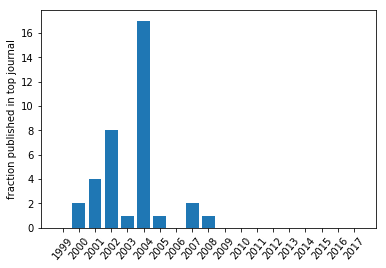

In [14]:
plt.bar(range(len(fractions)), list(fractions.values()), align='center')
plt.xticks(range(len(fractions)), list(fractions.keys()), rotation = 50)
plt.ylabel('fraction published in top journal')
plt.show()